# JSON Parsor
---

## 1. environment setting
---

### 1. import package

In [1]:
import json
import os
import glob

### 2. set path

In [2]:
!pwd

/home/aiffel-dj1/workspace/Hackerton/workspace


In [3]:
home_dir_path = os.path.join(os.getenv('HOME'), 'workspace/Hackerton')
workspace_dir_path = os.path.join(home_dir_path, 'workspace')
data_dir_path = os.path.join(home_dir_path, 'RSI_OP_NIA_AIHUB')
sample_json_path = os.path.join(data_dir_path, 'buildings/training/label/BLD00001_PS3_K3A_NIA0276.json')

In [4]:
sample_json_path

'/home/aiffel-dj1/workspace/Hackerton/RSI_OP_NIA_AIHUB/buildings/training/label/BLD00001_PS3_K3A_NIA0276.json'

### 3. load json file

In [5]:
with open(sample_json_path, "r") as st_json:
    st_python = json.load(st_json)

type(st_python)

dict

## 2. Parse Json
---

### 1. define class :: type 1

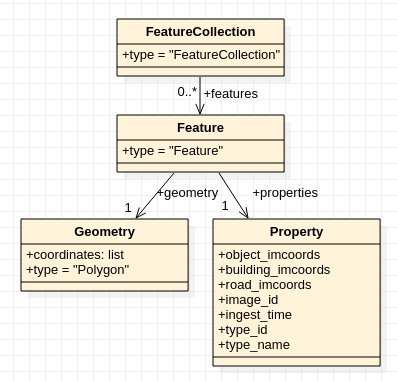

In [6]:
class Property():
    def __init__(self, raw):
        self.object_imcoords = raw['object_imcoords'] if 'object_imcoords' in raw else "EMPTY"
        self.building_imcoords = raw['building_imcoords'] if 'building_imcoords' in raw else "EMPTY"
        self.road_imcoords = raw['road_imcoords'] if 'road_imcoords' in raw else "EMPTY"
        self.image_id = raw['image_id'] if 'image_id' in raw else None
        self.ingest_time = raw['ingest_time'] if 'ingest_time' in raw else None
        self.type_id = raw['type_id'] if 'type_id' in raw else None
        self.type_name = raw['type_name'] if 'type_name' in raw else None
        
    def is_building(self):
        ans = False
        if self.building_imcoords != "EMPTY" and self.road_imcoords == "EMPTY":
            ans = True
        return ans
    
    def is_road(self):
        ans = False
        if self.building_imcoords == "EMPTY" and self.road_imcoords != "EMPTY":
            ans = True
        return ans
    
    def __str__(self):
        return f'''{{
    object_imcoords : {self.object_imcoords},
    building_imcoords : {self.building_imcoords},
    road_imcoords : {self.road_imcoords},
    image_id : {self.image_id},
    ingest_time : {self.ingest_time},
    type_id : {self.type_id},
    type_name : {self.type_name}
}}
        '''
    
    def __repr__(self):
        data_type = "building" if self.is_building() else "road"
        _str = ""
        if data_type == "building":
            _str = f'Property : data type({data_type}), coordinates({self.building_imcoords})'
        else:
            _str = f'Property : data type({data_type}), coordinates({self.road_imcoords})'
        return _str

In [7]:
class Geometry():
    def __init__(self, raw):
        self.coordinates = raw['coordinates'] if 'coordinates' in raw else []
        self.type = raw['type'] if 'type' in raw else ""

In [8]:
class Feature():
    def __init__(self, raw):
        self.type = "Feature"
        self.geometry = Geometry(raw['geometry']) if 'geometry' in raw else None
        self.properties = Property(raw['properties']) if 'properties' in raw else None

    def __str__(self):
        return 'Feature : Geometry({}), data type({})'.format(
            self.geometry.type,
            "building" if self.properties.is_building() else "road"
        )
    
    def __repr__(self):
        return self.__str__()

In [9]:
class FeatureCollection():
    def __init__(self, raw):
        self.type = "FeatureCollection"
        self.features = []
        
        if 'features' in raw and type(raw['features']) == list:
            self.features = [ Feature(feature) for feature in raw['features'] ]
    
    def __str__(self):
        return f'FeatureCollection with {len(self.features)} features'
    
    def __repr__(self):
        return self.__str__()

In [10]:
fc = FeatureCollection(st_python)

In [11]:
fc

FeatureCollection with 215 features

In [12]:
fc.features[0]

Feature : Geometry(Polygon), data type(building)

In [13]:
fc.features[0].geometry

In [14]:
fc.features[0].properties

Property : data type(building), coordinates(856.2952642894032,1000.8046984782792,828.0083112141339,1024,879.9702141458786,1023.8647145722488,878.740346620867,1015.2556418971668)

In [15]:
print(fc.features[0].properties)

{
    object_imcoords : EMPTY,
    building_imcoords : 856.2952642894032,1000.8046984782792,828.0083112141339,1024,879.9702141458786,1023.8647145722488,878.740346620867,1015.2556418971668,
    road_imcoords : EMPTY,
    image_id : BLD00001_PS3_K3A_NIA0276.png,
    ingest_time : 2020-10-27T02:04:23.355595Z,
    type_id : 2,
    type_name : 아파트
}
        


In [16]:
img = [feature.properties.image_id for feature in fc.features]
set(img)

{'BLD00001_PS3_K3A_NIA0276.png'}

### 2. define class :: type 2

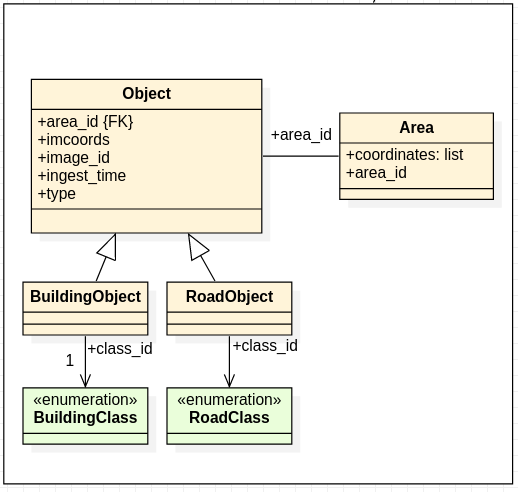

In [17]:
class Object():
    def __init__(self, raw):
        self.area_id = raw['area_id'] if 'area_id' in raw else None
        self.imcoords = raw['imcoords'] if 'imcoords' in raw else None
        self.image_id = raw['image_id'] if 'image_id' in raw else None
        self.ingest_time = raw['ingest_time'] if 'ingest_time' in raw else None
        self.type = None

In [18]:
class BuildingObject(Object):
    def __init__(self, raw):
        Object.__init__(self, raw)
        self.type = "building"
        self.class_id = raw['class_id'] if 'class_id' in raw else None
    
  
    def __str__(self):
        return f'''{{
    area_id : {self.area_id},
    imcoords : {self.imcoords},
    image_id : {self.image_id},
    ingest_time : {self.ingest_time},
    type : {self.type}
}}
        '''
    
    def __repr__(self):
        return f'Object({self.type}): coordinates({self.imcoords}, class({self.class_id}))'

In [19]:
class RoadObject(Object):
    def __init__(self, raw):
        Object.__init__(self, raw)
        self.type = "road"
        self.class_id = raw['class_id'] if 'class_id' in raw else None
    
  
    def __str__(self):
        return f'''{{
    area_id : {self.area_id},
    imcoords : {self.imcoords},
    image_id : {self.image_id},
    ingest_time : {self.ingest_time},
    type : {self.type}
}}
        '''
    
    def __repr__(self):
        return f'Object({self.type}): coordinates({self.imcoords}, class({self.class_id}))'

In [20]:
class Area():
    def __init__(self, coodinates, area_id):
        self.coodinates = coodinates
        self.area_id = area_id
    
    def __str__(self):
        return f'Area({self.area_id}) : {self.coordinates}'

### 3. parsing

#### A. load all json file

In [21]:
from tqdm.notebook import tqdm

def load_json(file_paths):
    res = {}
    for file_path in tqdm(file_paths):
        with open(file_path, "r") as f:
            name = os.path.basename(f.name)
            if name in res:
                print(f'WARNING : file name {naem} is duplicated')
            else:
                res[name] = json.load(f)
    return res

In [22]:
buildings_train_label_pattern = data_dir_path + r"/buildings/training/label/*.json"
buildings_val_label_pattern = data_dir_path + r"/buildings/validation/label/*.json"
roads_train_label_pattern = data_dir_path + r"/roads/training/label/*.json"
roads_val_label_pattern = data_dir_path + r"/roads/validation/label/*.json"

In [23]:
buildings_train_label_paths = glob.glob(buildings_train_label_pattern)
buildings_val_label_paths = glob.glob(buildings_val_label_pattern)
roads_train_label_paths = glob.glob(roads_train_label_pattern)
roads_val_label_paths = glob.glob(roads_val_label_pattern)

print(f'len(buildings_train_label_paths) : {len(buildings_train_label_paths)}')
print(f'len(buildings_val_label_paths) : {len(buildings_val_label_paths)}')
print(f'len(roads_train_label_paths) : {len(roads_train_label_paths)}')
print(f'len(roads_val_label_paths) : {len(roads_val_label_paths)}')

len(buildings_train_label_paths) : 1238
len(buildings_val_label_paths) : 159
len(roads_train_label_paths) : 1143
len(roads_val_label_paths) : 127


In [24]:
buildings_train_label_json = load_json(buildings_train_label_paths)
buildings_val_label_json = load_json(buildings_val_label_paths)
roads_train_label_json = load_json(roads_train_label_paths)
roads_val_label_json = load_json(roads_val_label_paths)

  0%|          | 0/1238 [00:00<?, ?it/s]

  0%|          | 0/159 [00:00<?, ?it/s]

  0%|          | 0/1143 [00:00<?, ?it/s]

  0%|          | 0/127 [00:00<?, ?it/s]

In [25]:
print(f'len(buildings_train_label_json) : {len(buildings_train_label_json)}')
print(f'len(buildings_val_label_json) : {len(buildings_val_label_json)}')
print(f'len(roads_train_label_json) : {len(roads_train_label_json)}')
print(f'len(roads_val_label_json) : {len(roads_val_label_json)}')

len(buildings_train_label_json) : 1238
len(buildings_val_label_json) : 159
len(roads_train_label_json) : 1143
len(roads_val_label_json) : 127


In [26]:
all_keys = list(buildings_train_label_json.keys()) + \
           list(buildings_val_label_json.keys()) + \
           list(roads_train_label_json.keys()) + \
           list(roads_val_label_json.keys())
print(len(all_keys), len(list(set(all_keys))))
### key들에 중복이 존재

2667 2208


#### B. parse json as class type 1

In [27]:
all_json = list(buildings_train_label_json.values()) + \
           list(buildings_val_label_json.values()) +  \
           list(roads_train_label_json.values()) + \
           list(roads_val_label_json.values())
feature_collections = [ FeatureCollection(_json) for _json in tqdm(all_json) ]

  0%|          | 0/2667 [00:00<?, ?it/s]

In [28]:
feature_collections[0]

FeatureCollection with 82 features

In [29]:
feature_collections[0].features[0]

Feature : Geometry(Polygon), data type(building)

In [30]:
feature_collections[0].features[0].geometry

In [31]:
print(feature_collections[0].features[0].properties)

{
    object_imcoords : EMPTY,
    building_imcoords : -2.131628207280301e-14,148.53997916404757,1.0658141036401504e-14,91.30089230298044,36.04343457715326,66.05648613020645,42.82149838107574,74.12260545558313,48.909007119353994,70.06023460932046,76.68879915473228,107.60670945217178,55.94824243968657,122.33223161912196,42.204868036767515,104.95895503635784,17.85582895458094,122.653196720589,18.242827538633605,126.85505422323516,66.18095017953048,187.72328033711003,119.64492324076936,148.76699779173987,135.42422499984588,171.81463346302553,79.10903882572521,214.04945682270335,127.69867593135496,274.8882023996009,157.9430991782548,253.82912250916695,144.0530677611601,238.1468289737374,163.09585276846738,225.15292861581003,191.77204666182428,260.7741382177143,184.15493265890137,266.3749573375106,189.75575177869763,273.31997304605795,175.19362206722732,285.19370958002605,166.50123658597187,285.7097543174096,163.4767942612819,281.60747500129526,94.3177939773692,334.2568850694414,99.08721816

#### C. Abstract Area

- wkt
    - 정의 : https://en.wikipedia.org/wiki/Well-known_text_representation_of_geometry
    - 데이터 확인 : https://clydedacruz.github.io/openstreetmap-wkt-playground/

1️⃣ Geometry 추출

In [32]:
geometreis = [ f.geometry for fc in feature_collections for f in fc.features ]
len(geometreis), geometreis[:5]

(197931,
  <__main__.Geometry at 0x7f5d9f494390>])

2️⃣ list 형태로 되어 있는 좌표정보(coordinates)를 wkt로 변화

In [33]:
def coor_to_polygon(coordinates):
    """
    [[x1, y1, z1],
     [x2, y2, z2],
     [x3, y3, z3],
     [x4, y4, z4]]
    to
    POLYGON ((x1 y1, x2 y2, x3 y3, x4 y4, x1 y1))
    """
    coordinates.append(coordinates[0])
    wkt = "POLYGON(("
    wkt += ", ".join([" ".join(map(str, coor[:-1])) for coor in coordinates])
    wkt += "))"
    return wkt

In [34]:
area_coor = [coor_to_polygon(geometry.coordinates) for geometry in tqdm(geometreis)]
area_coor = list(set(area_coor))
len(area_coor), area_coor[:5]

  0%|          | 0/197931 [00:00<?, ?it/s]

(2208,
 ['POLYGON((-118.2305966915 33.8915464867, -118.2245071402 33.8916071673, -118.2245797319 33.8966855469, -118.2306696439 33.8966248548, -118.2305966915 33.8915464867))',
  'POLYGON((31.3215762936 30.0484080622, 31.3274160612 30.0484824762, 31.3273306631 30.0535629238, 31.3214905978 30.0534884946, 31.3215762936 30.0484080622))',
  'POLYGON((31.3715473042 29.9745671963, 31.3773828951 29.9746392316, 31.3773002934 29.9797198642, 31.3714644058 29.9796478142, 31.3715473042 29.9745671963))',
  'POLYGON((-117.5741654098 33.9661914762, -117.5680694454 33.9662197639, -117.5681032186 33.9712989951, -117.5741995453 33.9712707021, -117.5741654098 33.9661914762))',
  'POLYGON((31.3365342064 29.9741295588, 31.342369669 29.9742031443, 31.3422852869 29.9792836879, 31.3364495275 29.9792100875, 31.3365342064 29.9741295588))'])

3️⃣ Area 형태로 데이터 변환

In [35]:
def fill_zero_at_front(nums, length):
    nums_str = str(nums)
    nums_str = '0'*(length-len(nums_str)) + nums_str
    return nums_str

In [36]:
areas = [[f"AREA_{fill_zero_at_front(i+1, 7)}", coor] for i, coor in tqdm(enumerate(area_coor), total=len(area_coor)) ]
areas[:5]

  0%|          | 0/2208 [00:00<?, ?it/s]

[['AREA_0000001',
  'POLYGON((-118.2305966915 33.8915464867, -118.2245071402 33.8916071673, -118.2245797319 33.8966855469, -118.2306696439 33.8966248548, -118.2305966915 33.8915464867))'],
 ['AREA_0000002',
  'POLYGON((31.3215762936 30.0484080622, 31.3274160612 30.0484824762, 31.3273306631 30.0535629238, 31.3214905978 30.0534884946, 31.3215762936 30.0484080622))'],
 ['AREA_0000003',
  'POLYGON((31.3715473042 29.9745671963, 31.3773828951 29.9746392316, 31.3773002934 29.9797198642, 31.3714644058 29.9796478142, 31.3715473042 29.9745671963))'],
 ['AREA_0000004',
  'POLYGON((-117.5741654098 33.9661914762, -117.5680694454 33.9662197639, -117.5681032186 33.9712989951, -117.5741995453 33.9712707021, -117.5741654098 33.9661914762))'],
 ['AREA_0000005',
  'POLYGON((31.3365342064 29.9741295588, 31.342369669 29.9742031443, 31.3422852869 29.9792836879, 31.3364495275 29.9792100875, 31.3365342064 29.9741295588))']]

In [37]:
len(areas[0])

2

4️⃣ csv 저장

In [38]:
import csv
def save_csv(path, data, fields):
    if type(data) != list:
        assert f'[save_csv] The type of input parameter data must be list.'
    if not data:
        assert f'[save_csv] The parameter data should not empty.'
    if len(data[0]) != len(fields):
        assert f'[save_csv] The number of data column and fields must be same.'
            
    with open(path, "w", newline="", encoding="utf-8") as f:
        writer = csv.writer(f)
        writer.writerow(fields)
        writer.writerows(data)

In [39]:
merged_dir_path = os.path.join(data_dir_path, 'merged')
save_csv(os.path.join(merged_dir_path, 'Area.csv'), areas, ['area_id', 'coordinates'])

5️⃣ 저장된 파일 확인

In [40]:
import pandas as pd
area_path = os.path.join(merged_dir_path, 'Area.csv')
df = pd.read_csv(area_path, encoding='utf-8')
df

area_id                                        coordinates
0     AREA_0000001  POLYGON((-118.2305966915 33.8915464867, -118.2...
1     AREA_0000002  POLYGON((31.3215762936 30.0484080622, 31.32741...
2     AREA_0000003  POLYGON((31.3715473042 29.9745671963, 31.37738...
3     AREA_0000004  POLYGON((-117.5741654098 33.9661914762, -117.5...
4     AREA_0000005  POLYGON((31.3365342064 29.9741295588, 31.34236...
...            ...                                                ...
2203  AREA_0002204  POLYGON((121.6224407181 31.2843080406, 121.628...
2204  AREA_0002205  POLYGON((10.8528115158 52.4622292688, 10.86109...
2205  AREA_0002206  POLYGON((31.4295843082 29.9955989464, 31.43542...
2206  AREA_0002207  POLYGON((31.3565313155 30.0539311821, 31.36237...
2207  AREA_0002208  POLYGON((10.7434993675 52.423379992, 10.751777...

[2208 rows x 2 columns]

In [41]:
from shapely import wkt
import geopandas as gpd

df['coordinates'] = gpd.GeoSeries.from_wkt(df['coordinates'])
gdf = gpd.GeoDataFrame(df, geometry='coordinates')
gdf

area_id                                        coordinates
0     AREA_0000001  POLYGON ((-118.23060 33.89155, -118.22451 33.8...
1     AREA_0000002  POLYGON ((31.32158 30.04841, 31.32742 30.04848...
2     AREA_0000003  POLYGON ((31.37155 29.97457, 31.37738 29.97464...
3     AREA_0000004  POLYGON ((-117.57417 33.96619, -117.56807 33.9...
4     AREA_0000005  POLYGON ((31.33653 29.97413, 31.34237 29.97420...
...            ...                                                ...
2203  AREA_0002204  POLYGON ((121.62244 31.28431, 121.62836 31.284...
2204  AREA_0002205  POLYGON ((10.85281 52.46223, 10.86110 52.46210...
2205  AREA_0002206  POLYGON ((31.42958 29.99560, 31.43542 29.99567...
2206  AREA_0002207  POLYGON ((31.35653 30.05393, 31.36237 30.05400...
2207  AREA_0002208  POLYGON ((10.74350 52.42338, 10.75178 52.42326...

[2208 rows x 2 columns]

In [42]:
type(gdf['coordinates'][0])

shapely.geometry.polygon.Polygon

🧐 **AREA 분포 확인**

In [43]:
import matplotlib.pyplot as plt
import folium


m = folium.Map(zoom_start=10, tiles='CartoDB positron')

for _, r in gdf.iterrows():
    sim_geo = gpd.GeoSeries(r['coordinates']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j,
                           style_function=lambda x: {'fillColor': 'orange'})
    folium.Popup(r['area_id']).add_to(geo_j)
    geo_j.add_to(m)
m

#### D. Abstract Building Object

1️⃣ Buildings 추출

In [141]:
def imcoords_to_wkt(coordinates):
    if coordinates == "":
        return None # Nan
    
    coor = coordinates.split(',')
    if len(coor) < 6:
        return None # 다각형은 세개 이상의 점으로 이루어 진다.
    
    
    coor = [f'{round(float(coor[i]))} {round(float(coor[i+1]))}' for i in range(0, len(coor), 2)]
    coor += [coor[0]]
    wkt = 'POLYGON((' + ", ".join(coor) + '))'
    return wkt

In [142]:
def get_building_attributes(feature):
    return {
        'imcoords': imcoords_to_wkt(feature.properties.building_imcoords),
        'image_id': feature.properties.image_id,
        'ingest_time': feature.properties.ingest_time,
        'class_id': feature.properties.type_id,
        'type': "building",
        'area_geometry': coor_to_polygon(feature.geometry.coordinates)
    }

In [143]:
buildings = [get_building_attributes(f) for fc in feature_collections 
             for f in fc.features 
             if f.properties.is_building()]
print(len(buildings))

172272


In [144]:
buildings = [b for b in buildings if b['imcoords']]
print(len(buildings))

172202


3️⃣ csv 저장

In [146]:
column_names = ['type', 'image_id', 'ingest_time', 'imcoords', 'class_id', 'area_geometry']
buildings_list = [[b[c] for c in column_names] for b in buildings]
buildings_list[0]

['building',
 'OBJ00875_PS3_K3_NIA0089.png',
 '2020-11-19T00:57:46.430325Z',
 'POLYGON((0 149, 0 91, 36 66, 43 74, 49 70, 77 108, 56 122, 42 105, 18 123, 18 127, 66 188, 120 149, 135 172, 79 214, 128 275, 158 254, 144 238, 163 225, 192 261, 184 266, 190 273, 175 285, 167 286, 163 282, 94 334, 99 343, 84 350, 80 345, 71 348, 49 319, 68 306, 77 314, 111 289, 93 280, 94 268, 84 267, 72 252, 67 255, 53 239, 64 234, 55 230, 34 203, 28 205, 16 190, 21 180, 0 149))',
 '5',
 'POLYGON((-104.8997128936 39.7169121313, -104.8913499349 39.7169046065, -104.8913397997 39.7233631342, -104.8997035385 39.7233706607, -104.8997128936 39.7169121313, -104.8997128936 39.7169121313, -104.8997128936 39.7169121313, -104.8997128936 39.7169121313, -104.8997128936 39.7169121313, -104.8997128936 39.7169121313, -104.8997128936 39.7169121313, -104.8997128936 39.7169121313, -104.8997128936 39.7169121313, -104.8997128936 39.7169121313, -104.8997128936 39.7169121313, -104.8997128936 39.7169121313, -104.8997128936 39.716

In [147]:
merged_dir_path = os.path.join(data_dir_path, 'merged')
save_csv(os.path.join(merged_dir_path, 'Buildings.csv'), buildings_list, column_names)

5️⃣ 저장된 파일 확인

In [148]:
import pandas as pd
area_path = os.path.join(merged_dir_path, 'Buildings.csv')
df = pd.read_csv(area_path, encoding='utf-8')
df.head(5)

type                     image_id                  ingest_time  \
0  building  OBJ00875_PS3_K3_NIA0089.png  2020-11-19T00:57:46.430325Z   
1  building  OBJ00875_PS3_K3_NIA0089.png  2020-11-19T00:57:46.430325Z   
2  building  OBJ00875_PS3_K3_NIA0089.png  2020-11-19T00:57:46.430325Z   
3  building  OBJ00875_PS3_K3_NIA0089.png  2020-11-19T00:57:46.430325Z   
4  building  OBJ00875_PS3_K3_NIA0089.png  2020-11-19T00:57:46.430325Z   

                                            imcoords  class_id  \
0  POLYGON((0 149, 0 91, 36 66, 43 74, 49 70, 77 ...         5   
1  POLYGON((126 110, 176 176, 203 155, 159 95, 14...         1   
2  POLYGON((117 72, 137 98, 182 66, 162 39, 117 72))         1   
3  POLYGON((185 6, 257 105, 286 83, 222 0, 191 0,...         5   
4  POLYGON((189 179, 207 203, 253 169, 235 145, 1...         1   

                                       area_geometry  
0  POLYGON((-104.8997128936 39.7169121313, -104.8...  
1  POLYGON((-104.8997128936 39.7169121313, -104.8...  
2  POLYGON((-104.8997128936 39.7169121313, -104.8...  
3  POLYGON((-104.8997128936 39.7169121313, -104.8...  
4  POLYGON((-104.8997128936 39.7169121313, -104.8...

In [150]:
from shapely import wkt
import geopandas as gpd

df['imcoords'] = gpd.GeoSeries.from_wkt(df['imcoords'])
gdf = gpd.GeoDataFrame(df[:5], geometry='imcoords')
gdf

type                     image_id                  ingest_time  \
0  building  OBJ00875_PS3_K3_NIA0089.png  2020-11-19T00:57:46.430325Z   
1  building  OBJ00875_PS3_K3_NIA0089.png  2020-11-19T00:57:46.430325Z   
2  building  OBJ00875_PS3_K3_NIA0089.png  2020-11-19T00:57:46.430325Z   
3  building  OBJ00875_PS3_K3_NIA0089.png  2020-11-19T00:57:46.430325Z   
4  building  OBJ00875_PS3_K3_NIA0089.png  2020-11-19T00:57:46.430325Z   

                                            imcoords  class_id  \
0  POLYGON ((0.000 149.000, 0.000 91.000, 36.000 ...         5   
1  POLYGON ((126.000 110.000, 176.000 176.000, 20...         1   
2  POLYGON ((117.000 72.000, 137.000 98.000, 182....         1   
3  POLYGON ((185.000 6.000, 257.000 105.000, 286....         5   
4  POLYGON ((189.000 179.000, 207.000 203.000, 25...         1   

                                       area_geometry  
0  POLYGON((-104.8997128936 39.7169121313, -104.8...  
1  POLYGON((-104.8997128936 39.7169121313, -104.8...  
2  POLYGON((-104.8997128936 39.7169121313, -104.8...  
3  POLYGON((-104.8997128936 39.7169121313, -104.8...  
4  POLYGON((-104.8997128936 39.7169121313, -104.8...